**Project 1: Neural Netwroks_Classification_MNIST_Dataset_Keras_Tensorflow**

### Import Libraries 

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras


### Load MNIST Dataset form Keras

In [6]:
#fashion_mnist = keras.datasets.fashion_minst

from keras.datasets import fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() # data defualt trained, tested, Y_train is lables w.r.t X_train_imgs

In [7]:
X_train_full.shape # img =60K

(60000, 28, 28)

In [8]:
X_train_full.dtype # datatype: int, flot, char.,etc., but here,pixel intensity represented as byte (0 t0 255)

dtype('uint8')

In [9]:
### Details of data: contains 60,000 grayscale images, each 28x28 pixel
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255. 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

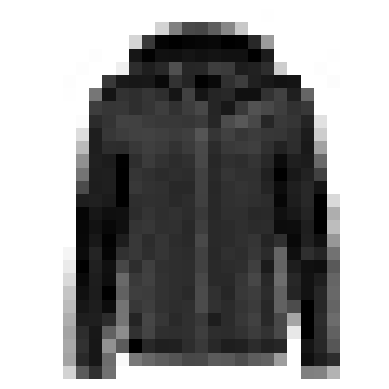

In [10]:
# Plot data matplotlibs imshow() with binary color map
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [11]:
# lable are class IDs represent as uint8 from 0 to 9
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [12]:
len(y_train)

55000

In [13]:
# Assign Class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
class_names[y_train[0]]

'Coat'

In [15]:
# Check Validation set cotains 5000, test set contain 10,000 images
X_valid.shape

(5000, 28, 28)

In [16]:
X_test.shape

(10000, 28, 28)

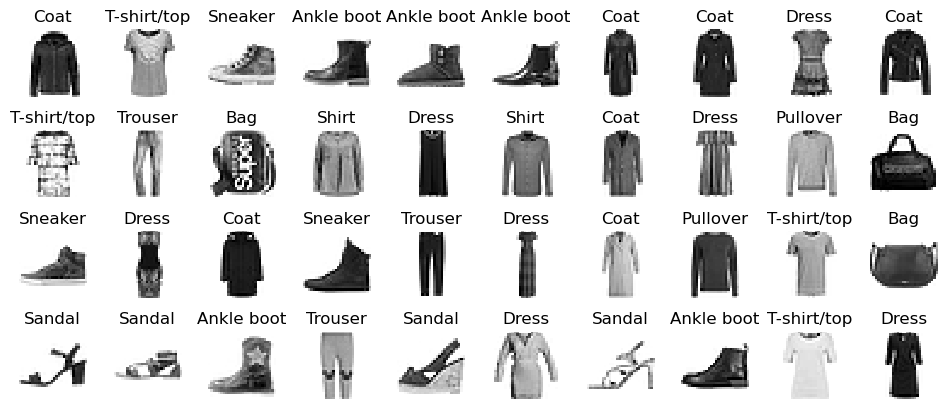

In [17]:
# Let's take a look at a sample of the images in the dataset
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
         for col in range(n_cols):
             index = n_cols * row + col
             plt.subplot(n_rows, n_cols, index + 1)
             plt.imshow(X_train[index], cmap= 'binary', interpolation= 'nearest' )
             plt.axis('off')
             plt.title(class_names[y_train[index]], fontsize=12)
             plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
# Model Architecture 
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))

model.add(keras.layers.Conv2D(filters= 96 , kernel_size= 11,strides=(4, 4))) # input (784), but required (batch size, H, W, channel)??
model.add(keras.layers.ReLU()(layer))
model.add(keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
model.add(keras.layers.BatchNormalization()(layer,training=True))

model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model.summary() # summary of layers

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

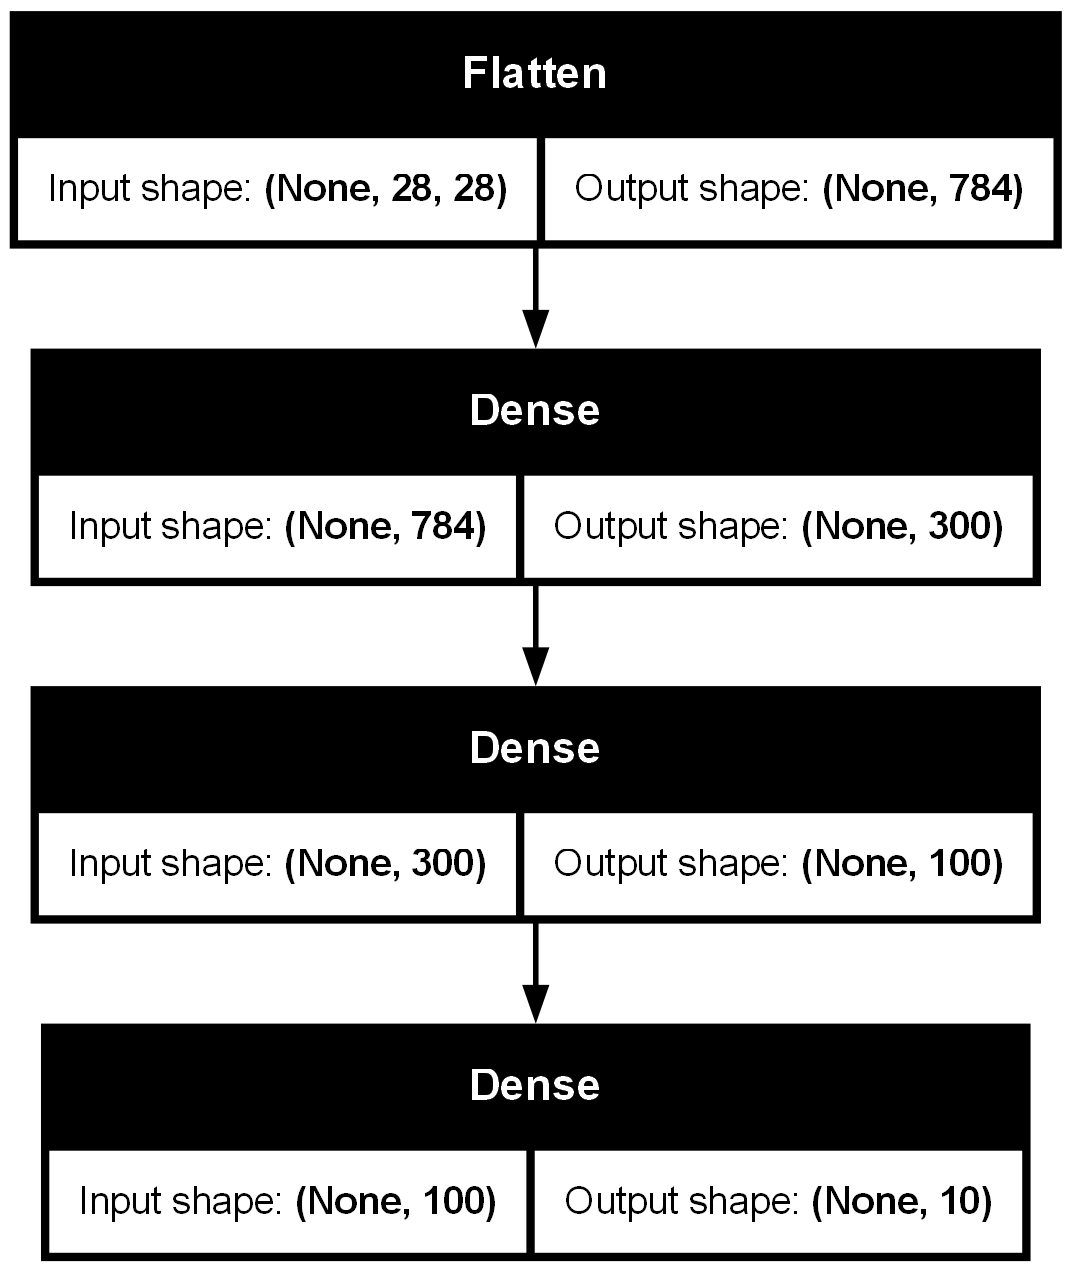

In [ ]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7681 - loss: 0.7043 - val_accuracy: 0.8276 - val_loss: 0.5063
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8326 - loss: 0.4810 - val_accuracy: 0.8492 - val_loss: 0.4433
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8476 - loss: 0.4363 - val_accuracy: 0.8568 - val_loss: 0.4123
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8570 - loss: 0.4091 - val_accuracy: 0.8654 - val_loss: 0.3915
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8627 - loss: 0.3890 - val_accuracy: 0.8686 - val_loss: 0.3773
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8681 - loss: 0.3729 - val_accuracy: 0.8720 - val_loss: 0.3659
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8722 - loss: 0.3594 - val_accuracy: 0.8744 - val_loss: 0.3555
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8762 - loss: 0.3478 - 

#### Plot Accuracy Vs Loss

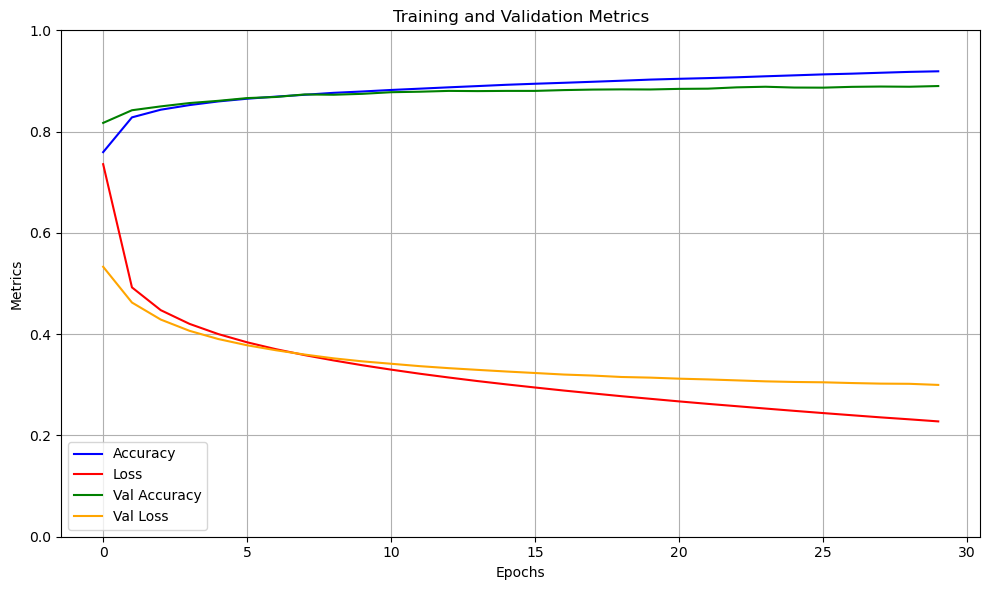

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `history` is your training history object
history_df = pd.DataFrame(history.history)

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the first two keys (Accuracy and Loss)
plt.plot(history_df['accuracy'], label='Accuracy', color='blue')
plt.plot(history_df['loss'], label='Loss', color='red')

# Plot the next two keys (Val_Accuracy and Val_Loss)
plt.plot(history_df['val_accuracy'], label='Val Accuracy', color='green')
plt.plot(history_df['val_loss'], label='Val Loss', color='orange')

# Set titles and labels
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1000 - loss: 2.8666


[2.8665549755096436, 0.10000000149011612]

#### Model prediction_classe

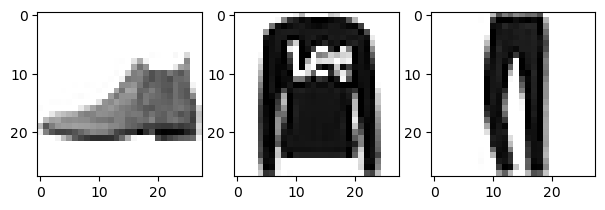

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


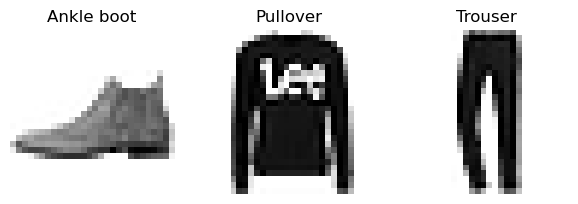

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

y_pred = np.argmax(model.predict(X_new), axis=-1)
np.array(class_names)[y_pred]

y_new = y_test[:3]
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()